In [4]:
def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../../shims/toric")   

import toric
import toric.samples

In [10]:
%matplotlib inline

import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np


In [60]:
def vector3_to_str(v):
    return "(%.2f, %.2f, %.2f)" % (v.x(), v.y(), v.z())
    
def toric_to_str(t):
    return "(a = %.2f°, t = %2.f°, p = %.2f°)" % (t.getAlpha().valueDegrees(), t.getTheta().valueDegrees(), t.getPhi().valueDegrees())

def toric_to_cam_np(t, PA, PB):
    c = toric.Toric3_ToWorldPosition(t, PA, PB)
    return np.array([c.x(),c.y(),c.z()])

In [102]:
PA = toric.Vector3(0,0,0)
PB = toric.Vector3(1,0,0)

t = toric.Toric3(toric.RadianPi(np.radians(45)),toric.Radian2Pi(np.radians(90)),toric.RadianPi(np.radians(0)))
print toric_to_str(t)

c = toric.Toric3_ToWorldPosition(t, PA, PB)
print vector3_to_str(c)

print toric_to_cam_np(t, PA, PB)

(a = 45.00°, t = 90°, p = 0.00°)
(1.00, -1.00, 0.00)
[ 1. -1.  0.]


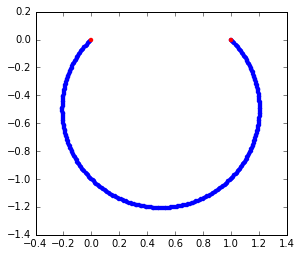

In [138]:


theta = np.arange(0,270)
alpha = [45]*len(theta)
phi   = [0] *len(alpha)

P = np.c_[ alpha, theta, phi ]

def myfunc(a):
    t = toric.Toric3(toric.RadianPi(np.radians(a[0])),toric.Radian2Pi(np.radians(a[1])),toric.RadianPi(np.radians(a[2])))
    return toric_to_cam_np(t, PA, PB)
    
C = np.apply_along_axis(myfunc, axis=1, arr=P)


plt.scatter(C[:,0],C[:,1],cmap='jet',linewidths=0)
plt.scatter([PA.x(), PB.x()],[PA.y(), PB.y()],c="red",linewidths=0)
plt.axes().set_aspect('equal')
